# 1. Импорт нужных библиотек и открытие датасета

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv ('C:\\Users\\Diana\\Desktop\\Pet-Projects\\Netflix.csv')
data=data.sort_values('release_year') #для удобства отсортировала по году выпуска кинокартин
data.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
23,23,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,tt0316472,6.8,231.0
27,27,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,tt0044429,7.4,1219.0
14,14,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,tt0047673,7.5,42373.0
21,21,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,tt0049761,6.7,590.0
15,15,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,tt0051390,7.5,4385.0


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5283 entries, 23 to 4494
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 495.3+ KB


In [284]:
data.isna().sum() 

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

Согласно общей информации о таблице, пустые ячейки в небольшом кол-ве содержатся в двух колонках: описание сюжета картины и кол-во проголосовавших на imdb. Это не повлияет на общий анализ. 
Однако почти половина строк не содержит информации о возрастном рейтинге кинокартины.


In [285]:
data.groupby('release_year', as_index=False).agg({'title':'count'})

,release_year,title
0,1953,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
61,2018,733
62,2019,749
63,2020,657
64,2021,687


База данных не включает информацию по 2023 и 2024 годам, а в 2022 году мы наблюдаем резкое сокращение кол-ва записей. Связано это с тем, что база данных была выложена в открытый доступ в один из первых месяцев 2022 года, соответственно не содержит данные полностью по этому году. Так как анализ в дальнейшем будет проводиться с учетом динамики показателей по годам, корректно будет убрать информацию по 2022 году вообще и не брать ее в расчет.

In [286]:
data=data[data.release_year != 2022]
data

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
23,23,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,tt0316472,6.8,231.0
27,27,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,tt0044429,7.4,1219.0
14,14,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,tt0047673,7.5,42373.0
21,21,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,tt0049761,6.7,590.0
15,15,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,tt0051390,7.5,4385.0
...,...,...,...,...,...,...,...,...,...,...,...
4705,4705,ts313781,The Club,SHOW,The most unexpected people can become your cho...,2021,TV-14,47,tt13317582,7.9,7810.0
4709,4709,tm673809,Schumacher,MOVIE,Through exclusive interviews and archival foot...,2021,NaN,112,tt10322274,7.4,21558.0
4706,4706,ts311791,The Raincoat Killer: Chasing a Predator in Korea,SHOW,"In the early 2000s, Yoo Young-chul hammered hi...",2021,TV-MA,48,tt15488654,6.4,1864.0
4707,4707,ts305264,School of Chocolate,SHOW,Eight top pastry and chocolate professionals e...,2021,TV-PG,38,tt15172154,7.6,1572.0


# 2. Описание датасета

index - индекс кинокартины

id - id кинокартины на Netflix

title - название кинокартины

type - тип кинокартины (фильм или сериал)

description - краткое описание сюжета

release_year - год выпуска кинокартины

age_certification - возрастной рейтинг кинокартины

runtime - длительность кинокартины в минутах (если сериал - длительность одного эпизода)

imdb_id - id кинокартины на imdb

imdb_score - рейтинг кинокартины на imdb

imdb_votes - кол-во проголосовавших на imdb

# 3. Анализ

В качестве целевого показателя выберем тип кинокартины (type).

Постараемся ответить на следующие вопросы:
1. Какой тип контента превалирует на Netflix - фильмы или сериалы?
2. Как это соотношение менялось за последние десятилетия?
3. Какой рейтинг и кол-во проголосовавших на IMDB в среднем у контента каждого типа?
4. Какой год зрители считают самым удачным/неудачным для кинематографа?
5. Какие фильмы и сериалы на Netflix имеют наибольший рейтинг и кол-во голосов на IMDB?
6. Контент для какой возрастной категории превалирует на Netflix?

*Вопрос 1. Какой тип контента превалирует на Netflix - фильмы или сериалы?*

In [287]:
count_movie = len(data.query('type == ["MOVIE"]'))
count_show = len(data.query('type == ["SHOW"]'))
sample1 = [count_movie, count_show]
sample2 = ['Фильмы', 'Сериалы']

Text(0.5, 1.0, 'Соотношение кол-ва фильмов и сериалов на Netflix')

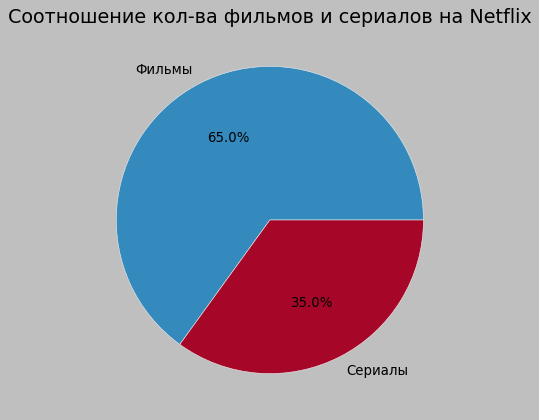

In [288]:
plt.style.use('classic') 
plt.style.use('bmh')
plt.pie(sample1, labels=sample2, autopct='%1.1f%%')
plt.title('Соотношение кол-ва фильмов и сериалов на Netflix')

На данный момент количество фильмов, доступных на Netflix, практически в два раза превышает количество сериалов. Но всегда ли соотношение было таким?
На данынй момент в киноиндустрии бытует мнение о "смерти" кино на большом экране и все большей доминации сериальной сферы с каждым годом. У нас есть шанс проверить это на примере одного из самых популярных онлайн-кинотеатров.

*Вопрос 2. Как менялось соотношение кол-ва фильма и сериалов на Netflix за последние годы?*

In [289]:
data.release_year.unique()

array([1953, 1954, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1966,
       1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

У нас собрана информация по кол-ву выпущенных фильмов и сериалов (содержащихся на Нетфликс) с 1953 по 2021 годы включительно, однако есть годы, которые на Нетфликс не представлены вообще. Их надо так же включить в список и указать, что им соответсвует 0 кинокартин того или иного вида, чтобы построить корректный график.

In [290]:
show_amount=data.query('type==["SHOW"]').groupby('release_year').agg({'type':'count'})
show_amount=show_amount['type'].tolist()
show_years=data.query('type==["SHOW"]').release_year.unique()
show_set = dict(zip(show_years, show_amount)) #словарь по сериалам (год = кол-во)

movie_amount=data.query('type==["MOVIE"]').groupby('release_year').agg({'type':'count'})
movie_amount=movie_amount['type'].tolist()
movie_years=data.query('type==["MOVIE"]').release_year.unique()
movie_set = dict(zip(movie_years, movie_amount)) #словарь по фильмам (год = кол-во)

In [291]:
yr1953_2022 = list(range(1953, 2022)) #список всех лет от 1953 до 2022 включительно
show_amount0=[] #с помощью цикла создадим список кол-ва сериалов по годам с 1953 по 2022
for i in yr1953_2022:
    if i in show_set:
        show_amount0.append(show_set[i])
    else:
        show_amount0.append(0)

movie_amount0=[] #с помощью цикла создадим список кол-ва фильмов по годам с 1953 по 2022
for i in yr1953_2022:
    if i in movie_set:
        movie_amount0.append(movie_set[i])
    else:
        movie_amount0.append(0)

#переведем перечень лет в текстовый формат, чтобы они корректно отображались на будущем графике
yr1953_2022=[str(i) for i in yr1953_2022] 

Теперь данные приведены в соответствующий вид для построения корректного графика.

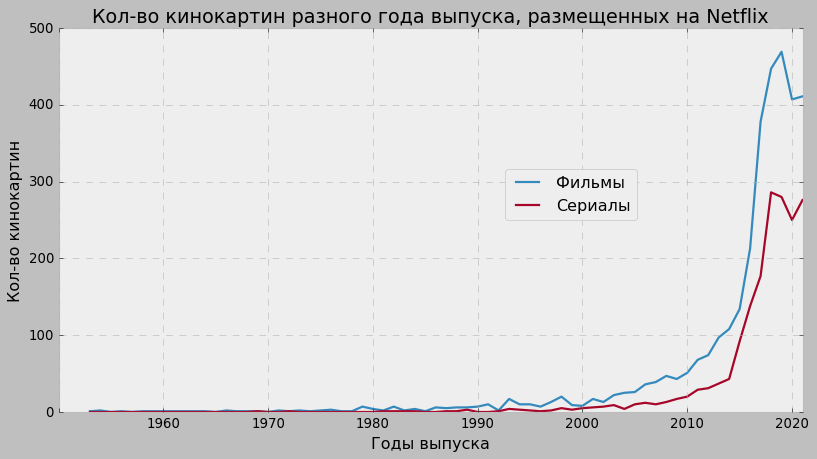

In [292]:
plt.figure(figsize = [6*2, 6])
plot1= plt.plot(yr1953_2022, movie_amount0, label = 'Фильмы')
plot2= plt.plot(yr1953_2022, show_amount0, label = 'Сериалы')
plt.xticks([-3, 7, 17, 27, 37, 47, 57, 67])
plt.ylabel('Кол-во кинокартин')
plt.xlabel('Годы выпуска')
plt.title('Кол-во кинокартин разного года выпуска, размещенных на Netflix')
plt.legend(loc=(0.6, 0.5))

Глядя на построенный линейный график, первым делом замечаешь 2 вещи:
1) рост кол-ва кинокартин по экспоненте после 2000 года;
2) резкое падения кол-ва кинокартин в 2020 году.

Первое можно объяснить в целом развитием киноиндустрии в результате технического прогресса, а также тем, что аудитории более интересны соверменные кинокартины.

Падение кол-ва кинокартин в 2020 году объясняется пандемией коронавируса, которая заморозила\замедлила деятельность большинства отраслей экономоки во всем мире, в т.ч. киноиндустрии. 

Но в итоге мы не добились изначальной цели, с которой строили данный график: не увидели изменения соотношения фильмов и сериалов в разные годы, т.к. динамика фильмов и сериалов в целом схожа и невооруженным глазом соотношение кажется примерно одинаковым. Проверим, так ли это (возьмем в расчет время с 1995 года).

In [293]:
rel=[]
yr1995_2021=list(range(1995, 2022))
for i in yr1995_2021:
    rel.append(show_set[i]/movie_set[i])

yr1995_2021=[str(i) for i in yr1995_2021] 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020'),
  Text(26, 0, '2021')])

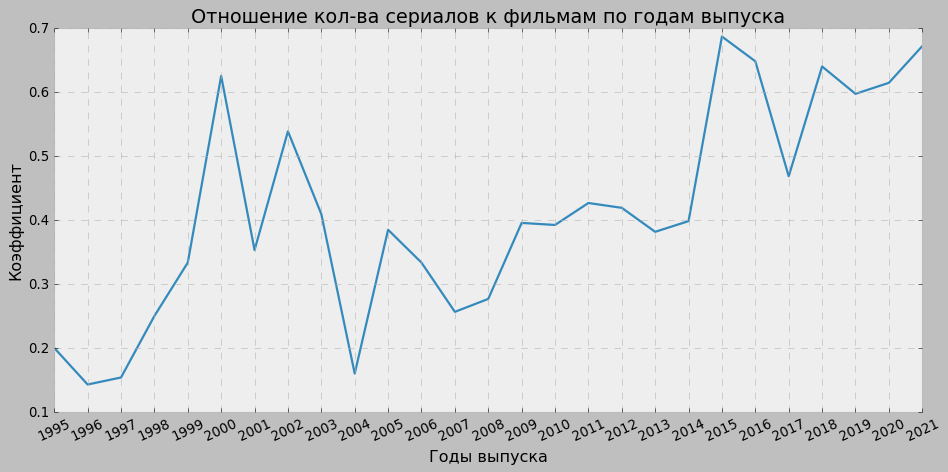

In [294]:
plt.figure(figsize = [7*2, 6])
plt.plot(yr1995_2021, rel)
plt.ylabel('Коэффициент')
plt.xlabel('Годы выпуска')
plt.title('Отношение кол-ва сериалов к фильмам по годам выпуска')
plt.xticks(rotation = 25)

На графике показан неравномерный рост данного коэффициента, но общий тренд наблюдается на явное увеличение со временем кол-ва сериалов по отношению к фильмам, выложенным на Netflix. На это может быть две причины:
1) общая ориентированность современное кинематографа на сериалы, нежели на полнометражные фильмы (т.к. это более выгодно - из одной идеи, сюжета, одного набора персонажей можно большее время получать финансовую выгоду; нет нужды придумывать что-то полностью новое каждые 2 часа хронометража);
2) ориентированность самого ресурса на сериальную сферу: Netflix практикует систему подписок от пользователей, а для них главной причиной продлить подписку является ожидание нового сезона любиомго сериала, который выйдет на конкретно этой платформе.

Стоит так же отметить, что на графике берутся в расчет кинопроекты целиком. Так, полномертажный фильм длительностью полтора часа будет считаться за единицу, так же как и многосезонный сериал, хронометраж которого составляет десятки часов, и который продолжает выпускаться на ресурсе и после года своего релиза. Поэтому даже несмотря на уже внушительные показатели того, что онлайн-кинотеатр увеличивает интерес к сериальному формату, это не дает нам полного представления о том, какой же все-таки контент превалирует на Netflix и насколько сильно.

К сожалению, данный датасет не дает нам возможность провести соответствующий анализ исходя из хронометража, потому что для сериалов указана только длительность 1 серии, а не всего сериала (кол-во серий так же указано).

*Вопрос 3. Какой рейтинг на IMDB в среднем у контента каждого типа?*

Internet Movie Database (IMDb, в переводе с англ. — «Интернет-база фильмов») — веб-сайт со свободно редактируемой и крупнейшей в мире базой данных о кинематографе.

Успех каждой кинокартины на Netflix исходя из имеющихся данных можно оценить по двум параметрам:
    1) рейтинг на IMDB, исходя из голосов зрителей;
    2) кол-во проголосовавших.
    
Первый параметр иллюстрирует одобрение/неодобрение зрителем картины, второй - уровень заинтересованности зрителя. Не всегда эти показатели буду прямопропорциональны друг другу. Так, картина может быть хорошо распиарена, но не понравиться зрителю в итоге. И наоборот - существует непопулярное/рассчитанное на узкую аудиторию кино высокого качества.

(array([0, 1]), [Text(0, 0, 'MOVIE'), Text(1, 0, 'SHOW')])

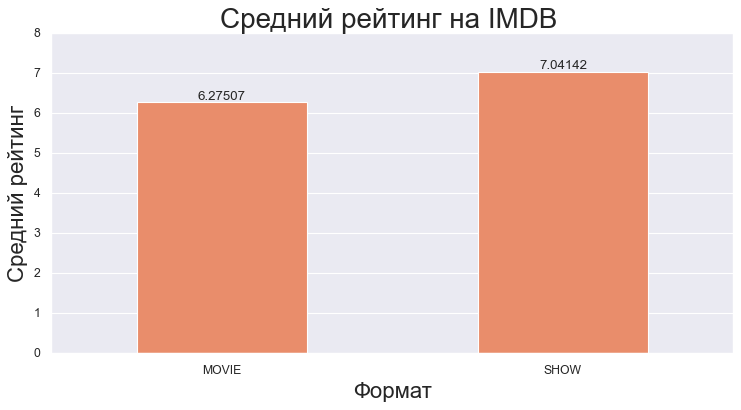

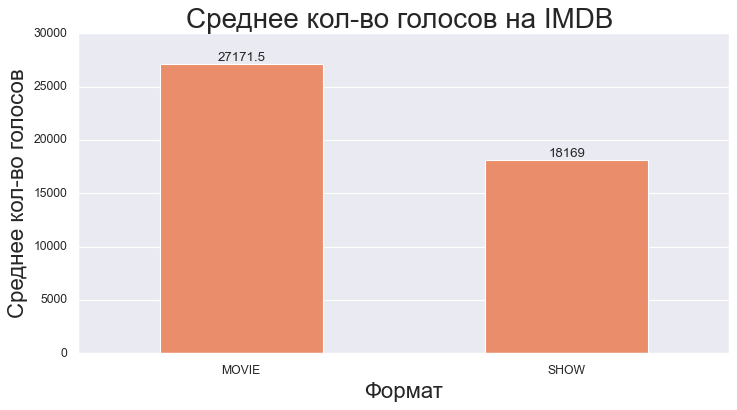

In [295]:
mean_score=data.groupby('type').agg({'imdb_score':'mean'})
sns.set_theme(palette="flare")
plot1=mean_score.plot(kind='bar',  figsize = [11, 5],  legend = False)
plot1.bar_label (plot1.containers [ 0 ])
plt.title('Средний рейтинг на IMDB ', fontsize = 25)
plt.ylabel('Средний рейтинг', fontsize = 20)
plt.xlabel('Формат', fontsize = 20)
plt.grid(axis = 'x')
plt.xticks(rotation = 0)

mean_votes=data.groupby('type').agg({'imdb_votes':'mean'})
plot2=mean_votes.plot(kind='bar', figsize = [10.5, 5], legend = False)
plot2.bar_label (plot2.containers [ 0 ])
plt.title('Среднее кол-во голосов на IMDB ', fontsize = 25)
plt.ylabel('Среднее кол-во голосов', fontsize = 20)
plt.xlabel('Формат', fontsize = 20)
plt.grid(axis = 'x')
plt.xticks(rotation = 0)

Как видно из вышеприведенных диаграм, фильмы вызывают больший интерес у аудитории, но оцениваются выше сериалы.

*Вопрос 4. Какой год зрители считают самым удачным/неудачным для кинематографа?*

In [296]:
score=data.groupby('release_year', as_index=False).agg({'imdb_score':['count', 'mean']})
score

release_year imdb_score          
                     count      mean
0          1953          1  6.800000
1          1954          2  7.450000
2          1956          1  6.700000
3          1958          1  7.500000
4          1959          1  6.700000
..          ...        ...       ...
60         2017        555  6.523063
61         2018        733  6.530559
62         2019        749  6.526168
63         2020        657  6.344444
64         2021        687  6.319068

[65 rows x 3 columns]

Будем брать в расчет годы, которые представлены на Netflix хотя бы 10-ю кинокартинами.

In [297]:
score.columns = ['release_year', 'count', 'mean']
score = score[score['count'] >= 10].sort_values('mean', ascending=False)
score['mean']=score['mean'].round(2)
score.release_year = score.release_year.astype(str)

Text(0.5, 1.0, 'Топ-10 лет с лучшей средней оценкой на IMDB')

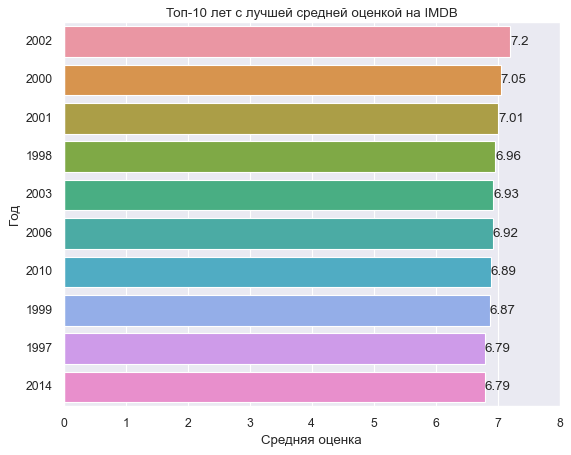

In [298]:
best_years=score.head(10)
sns.set_theme(palette="flare")
plot1=sns.barplot(data=best_years, y='release_year', x = 'mean', orient='h')
plot1.bar_label (plot1.containers [ 0 ])
plt.ylabel('Год')
plt.xlabel('Средняя оценка')
plt.title('Топ-10 лет с лучшей средней оценкой на IMDB')

Text(0.5, 1.0, 'Топ-10 лет с худшей средней оценкой на IMDB')

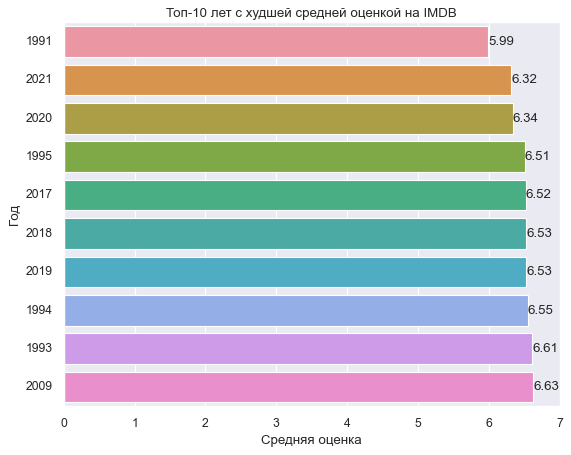

In [299]:
worst_years=score.tail(10).sort_values('mean', ascending=True)
plot2=sns.barplot(x='mean', y='release_year', data = worst_years, orient='h')
plot2.bar_label (plot2.containers [ 0 ])
plt.xlabel('Средняя оценка')
plt.ylabel('Год')
plt.title('Топ-10 лет с худшей средней оценкой на IMDB')

Из диаграмм видно, что самым удачным для кинематографа зрители считают 2002 год, а самым худшим - 1991.

*Вопрос 5. Какие фильмы и сериалы на Netflix имеют наибольший рейтинг и кол-во голосов на IMDB?*

In [300]:
#ТОП-5 СЕРИАЛОВ ПО РЕЙТИНГУ НА IMDB:

best_show_score=data.query('type==["SHOW"]').sort_values('imdb_score', ascending=False).head(5)
df = best_show_score[['title', 'release_year', 'imdb_score', 'imdb_votes']]
df

,title,release_year,imdb_score,imdb_votes
622,Khawatir,2005,9.6,3046.0
2787,#ABtalks,2018,9.6,7.0
229,Breaking Bad,2008,9.5,1727694.0
3144,Our Planet,2019,9.3,41386.0
245,Avatar: The Last Airbender,2005,9.3,297336.0


In [301]:
#ТОП-5 СЕРИАЛОВ ПО КОЛ-ВУ ГОЛОСОВ НА IMDB:

best_show_votes=data.query('type==["SHOW"]').sort_values('imdb_votes', ascending=False).head(5)
df = best_show_votes[['title', 'release_year', 'imdb_score', 'imdb_votes']]
df

,title,release_year,imdb_score,imdb_votes
229,Breaking Bad,2008,9.5,1727694.0
1145,Stranger Things,2016,8.7,989090.0
230,The Walking Dead,2010,8.2,945125.0
660,Black Mirror,2011,8.8,515577.0
883,House of Cards,2013,8.7,494092.0


In [302]:
#ТОП-5 ФИЛЬМОВ ПО РЕЙТИНГУ НА IMDB:

best_movie_score=data.query('type==["MOVIE"]').sort_values('imdb_score', ascending=False).head(5)
df=best_movie_score[['title', 'release_year', 'imdb_score', 'imdb_votes']]
df

,title,release_year,imdb_score,imdb_votes
822,Chhota Bheem & Krishna in Mayanagari,2011,9.0,5.0
2685,C/o Kancharapalem,2018,9.0,6562.0
24,No Longer Kids,1979,9.0,943.0
3172,David Attenborough: A Life on Our Planet,2020,9.0,31180.0
246,Inception,2010,8.8,2268288.0


In [303]:
#ТОП-5 ФИЛЬМОВ ПО КОЛ-ВУ ГОЛОСОВ НА IMDB:

best_movie_votes=data.query('type==["MOVIE"]').sort_values('imdb_votes', ascending=False).head(5)
df=best_movie_votes[['title', 'release_year', 'imdb_score', 'imdb_votes']]
df

,title,release_year,imdb_score,imdb_votes
246,Inception,2010,8.8,2268288.0
101,Forrest Gump,1994,8.8,1994599.0
662,Django Unchained,2012,8.4,1472668.0
104,Saving Private Ryan,1998,8.6,1346020.0
0,Taxi Driver,1976,8.3,795222.0


Примечательно, что сериал 'Breaking Bad' входит в топ-5 и по рейтингу, и по кол-ву проголосовавших на IMDB.

*Вопрос 6. Контент для какой возрастной категории превалирует на Netflix?*

Мы помним, что именно для колонки age_certification в таблице больше всего NaN-значений. Но насоклько много? Помешает ли это ответу на вопрос?

In [304]:
data1=data.fillna({'age_certification':'No certification'})
df=data1.groupby('age_certification').agg({'type':'count'}).sort_values('type', ascending=False)

In [305]:
df

,type
age_certification,
No certification,2224
TV-MA,735
R,527
TV-14,419
PG-13,415
PG,236
TV-PG,166
G,105
TV-Y7,100


Text(0.5, 1.0, 'Доля кинокартин по рейтингу')

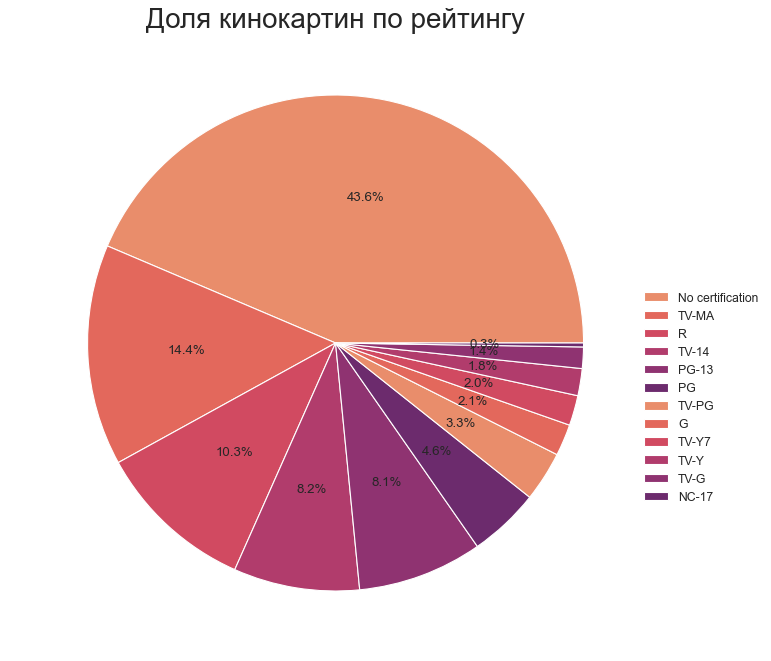

In [323]:
sns.set_theme(palette="flare")
df.plot.pie(y='type', labels=['','','','','','','','','','','','','','','',''], autopct ='%0.1f%%', figsize = (10,10))
plt.legend(bbox_to_anchor = (0.95, 0.1, 0.25, 0.5), labels=df.index)
plt.ylabel(' ')
plt.title('Доля кинокартин по рейтингу', fontsize = 25)

Почти половина кинокартин на Netflix не имеет маркер возрастного рейтинга, что не даст нам сложить верного впечатления о возрасте целевой аудитории даного онлайн-кинотеатра. Кроме того, в базе данных используютсяразные системы оценки возрастного рейтинга, так что в разные деления на круговой диаграмме попали фильмы, которые, по сути, имеют одинаковое возрастное ограничение.